# Explore Workbook for Justin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare
import explore

from sklearn.model_selection import train_test_split

# modeling methods
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE 
import sklearn.preprocessing

## Explore Equipment Rail

**Acquire**

In [2]:
df = acquire.get_equiprail()
df.shape

(22402, 146)

**Prepare**

In [3]:
df = prepare.prep_equip_df(df)
df.shape

(10550, 37)

In [ ]:
#Return a dataframe with the ratios for the railroad companies represented
rr_equip_ratios = pd.DataFrame(df.railroad_company.value_counts())
rr_equip_ratios['acc_class'] = 'equipment'
rr_equip_ratios.rename(columns={'railroad_company': 'value_counts'}, inplace=True)
rr_equip_ratios.reset_index(inplace=True)
rr_equip_ratios

In [ ]:
#Acquire HWY Rail Data
hwy_df = acquire.get_hwyrail()

#Prepare HWY Rail Data
hwy_df = prepare.prep_hwy_df(hwy_df)

#Return a dataframe with the value counts for the railroad company
rr_hwy_ratios = pd.DataFrame(hwy_df.railroad_company.value_counts())

rr_hwy_ratios['acc_class'] = 'highway'

rr_hwy_ratios.rename(columns={'railroad_company': 'value_counts'}, inplace=True)
rr_hwy_ratios.reset_index(inplace=True)

rr_hwy_ratios

In [ ]:
rr_value_counts = pd.concat([rr_equip_ratios, rr_hwy_ratios], ignore_index=True)
rr_value_counts.rename(columns={'index': 'railroad'}, inplace=True)
rr_value_counts

In [ ]:
#Strip whitespaces in railroad so that I can groupby
rr_value_counts.railroad = rr_value_counts['railroad'].str.strip()

In [ ]:
rr_value_counts.groupby('railroad').sum('value_counts')

In [ ]:
#Write to xlsx for tableau
#rr_value_counts.to_excel('rr_value_counts.xlsx')

In [ ]:
#Write the ratios dataframe to excel
#rr_ratios.to_excel('rr_ratios.xlsx')

In [ ]:
#Create lat and long data frame for tableau viz of equipment accidents

#equip_coordinates = df[['railroad_company','lat', 'long']]
#equip_coordinates.head()
#equip_coordinates.to_excel("equip_coordinates.xlsx")

In [ ]:
#def drop_under_represented_rr(df): 
#    '''
#    This function takes in a railroad accident data frame
#    and drops any observations representing railroad companies
#    where the railroad company has less than 300 accidents in the dataframe
#    
#    It returns a single dataframe
#    '''
#    
#    #Define the value counts for railroad_company in the dataframe
#    value_counts = df['railroad_company'].value_counts()
#    
#    #Select the observations to remove based on railroad_company count representation threshold
#    to_remove = value_counts[value_counts < 300].index
#    
#    # Keep rows where the railroad_company column is not in to_remove if n was defined
#    if 300 > 0:
#        df = df[~df.railroad_company.isin(to_remove)]
#    else: 
#        df = df 
#        
#    return df

In [ ]:
#df = drop_ur_rr(df)
#df.shape

**Explore some stats for impact of equipment rail accidents**

**What are Equipment Rail Accidents?**

**Explore Univariate**

In [ ]:
#def explore_univariate(train, cat_vars, quant_vars):
#    for var in cat_vars:
#        explore_univariate_categorical(train, var)
#        print('_________________________________________________________________')
#    for col in quant_vars:
#        p, descriptive_stats = explore_univariate_quant(train, col)
#        plt.show(p)
#        print(descriptive_stats)
#        
#def explore_univariate_categorical(train, cat_var):
#    '''
#    takes in a dataframe and a categorical variable and returns
#    a frequency table and barplot of the frequencies. 
#    '''
#    frequency_table = freq_table(train, cat_var)
#    plt.figure(figsize=(2,2))
#    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='white', edgecolor='grey')
#    plt.title(cat_var)
#    plt.show()
#    print(frequency_table)
#
#def explore_univariate_quant(train, quant_var):
#    '''
#    takes in a dataframe and a quantitative variable and returns
#    descriptive stats table, histogram, and boxplot of the distributions. 
#    '''
#    descriptive_stats = train[quant_var].describe()
#    plt.figure(figsize=(8,2))
#
#    p = plt.subplot(1, 2, 1)
#    p = plt.hist(train[quant_var], color='white', edgecolor='grey')
#    p = plt.title(quant_var)
#
#    # second plot: box plot
#    p = plt.subplot(1, 2, 2)
#    p = plt.boxplot(train[quant_var])
#    p = plt.title(quant_var)
#    return p, descriptive_stats
#    
#def freq_table(train, cat_var):
#    '''
#    for a given categorical variable, compute the frequency count and percent split
#    and return a dataframe of those values along with the different classes. 
#    '''
#    class_labels = list(train[cat_var].unique())
#
#    frequency_table = (
#        pd.DataFrame({cat_var: class_labels,
#                      'Count': train[cat_var].value_counts(normalize=False), 
#                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
#                    )
#    )
#    return frequency_table

In [ ]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

In [ ]:
explore.explore_univariate(df, cat_vars, quant_vars)

**Takeaways:**
    - Outlier in train speed? What train travels at 545 mph?
    - What is going on with the State column? Expected 50 but shows 56. Are the 6 extra representing terratories in the US?
    - Track Damages and Equip damages have outliers which is expected    

**More Univariate Exploration**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10550 entries, GC0512102 to 137065
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   state_fips         10550 non-null  int64         
 1   railroad_company   10550 non-null  object        
 2   accident_type      10550 non-null  int64         
 3   state_x            10550 non-null  int64         
 4   temp               10550 non-null  int64         
 5   visibility         10550 non-null  int64         
 6   weather            10550 non-null  int64         
 7   train_speed        10550 non-null  int64         
 8   train_direction    10550 non-null  float64       
 9   train_weight       10550 non-null  int64         
 10  train_type         10550 non-null  object        
 11  track_type         10550 non-null  int64         
 12  front_engines      10550 non-null  int64         
 13  loadfrght_cars     10550 non-null  int64         
 14  lo

In [ ]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["total_killed", "total_injured", "max_speed", "total_damage", 
              "engineers_onduty", "conductors_onduty", "brakemen_onduty", "region",
             "signal_type"]

In [ ]:
explore.explore_univariate(df, cat_vars, quant_vars)

**Takeaways:**
    - What does signal feature mean? The majority of the equip accidents are classified as not signaled...but what does that actually mean?
    

---

**Explore Outliers**

In [ ]:
def outlier_report(df):
    '''
    This function takes in a data frame and returns
    print statments stating the upper and lower bound outliers for 
    each column
    '''
    
    columns_to_check = ["temp",
                        "train_speed",
                        "train_weight",
                        "equip_damage",
                        "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                        "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    
    for col in columns_to_check:
        quartile_01, quartile_03 = np.percentile(df[col], [25, 75])
        iqr = quartile_03 - quartile_01
    
        lower_bound = round(quartile_01 -(2 * iqr), 3)
        upper_bound = round(quartile_03 +(2 * iqr), 3)
    
        #df['outlier'] = df[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    

        print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

In [ ]:
outlier_report(df)

In [ ]:
def visualize_outliers(df):
    '''
    This function takes in a dataframe
    and outputs boxplots to show outlier distribution
    for each column in the the dataframe
    '''
    cols_to_check = ["temp",
                    "train_speed",
                    "train_weight",
                    "equip_damage",
                    "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                    "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    for col in cols_to_check:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

In [ ]:
visualize_outliers(df)

**Drop Outliers in Total_Damage**

In [ ]:
df = df[df.total_damage < 234898.75]
df.shape

**Takeaways:**
   - Need to investigate outliers in:
        - max_speed & train speed...one over 500 mph
        - train weight
        - one super negative temp

**Split the Data**

In [5]:
train, validate, test = explore.train_validate_test_split(df, 'railroad_company', seed=444)
print(f'Train Shape: {train.shape}')
print(f'Validate Shape: {validate.shape}')
print(f'Test Shape: {test.shape}')

Train Shape: (5908, 37)
Validate Shape: (2532, 37)
Test Shape: (2110, 37)


**Is there a time of year where rail equipment accidents happen with more or less frequency?**

In [ ]:
#train['month'] = pd.DatetimeIndex(train['date']).month
#train.head()

In [ ]:
#train.month.hist()

In [ ]:
#train['season'] = train.month.apply(lambda x: "winter/fall" if x == 10 or 11 == 12 or x == 1 or x == 2 or x == 3 else "summer/spring")
#train.head()
        

In [ ]:
#train.season.hist()

**Takeaways:**
- Rail equipment accidents appear to happen more frequently in summer/spring months than in winter/fall months 

**What is the distribution of track damages?**

<AxesSubplot:>

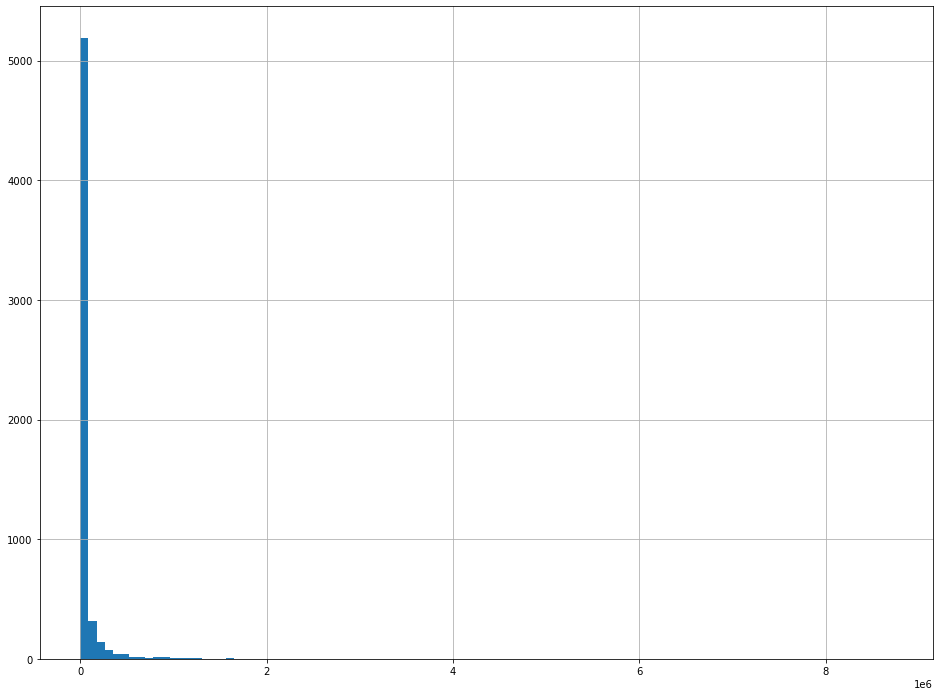

In [6]:
plt.figure(figsize=(16,12))
train.track_damage.hist(bins=100)

---

**What is the distribution of total_damage?**

<AxesSubplot:>

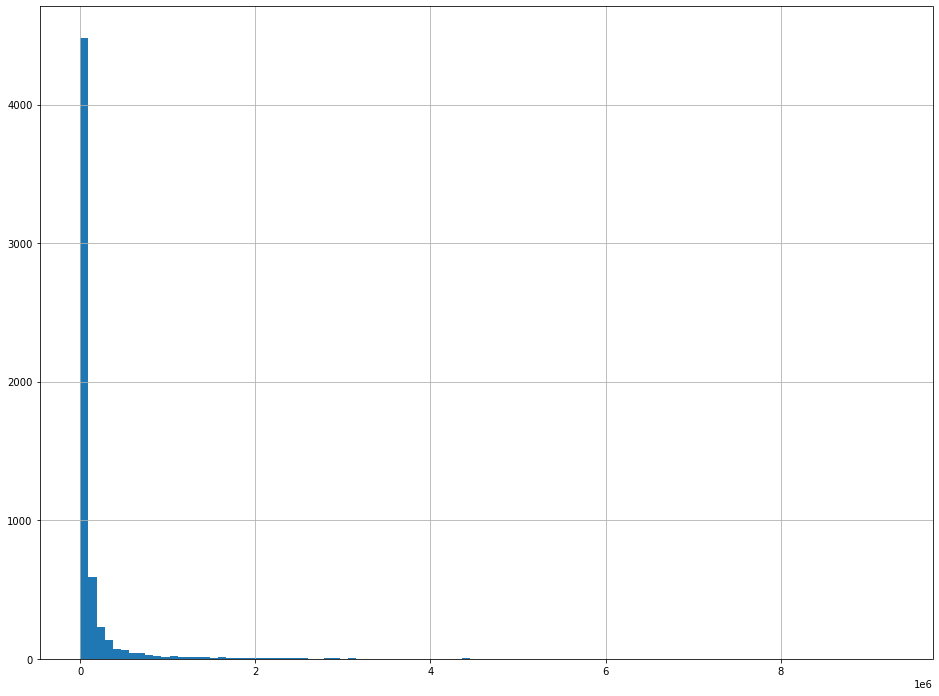

In [7]:
plt.figure(figsize=(16,12))
train.total_damage.hist(bins=100)

**Explore Bivariate**

In [ ]:
def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, 'railroad_company', cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, 'railroad_company', quant)


### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='white', edgecolor='grey')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='white', edgecolor='grey')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
   # p = plot_cat_by_target(train, target, cat_var)
    
    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    #plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

#def plot_cat_by_target(train, target, cat_var):
#    p = plt.figure(figsize=(2,2))
#    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
#    overall_rate = train[target].mean()
#    p = plt.axhline(overall_rate, ls='--', color='gray')
#    return p
    

## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)

In [ ]:
#Breakdown the features by categories for Univariate and Bivariate Functions from Explore Module
categorical_target = 'railroad_company'
cat_vars = ["train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

In [ ]:
#explore_bivariate(train, 'railroad_company', cat_vars, quant_vars)

**How do total damages compare by railroad?**

In [48]:
train_speed = pd.DataFrame(train.groupby('railroad_company').train_speed.median())
train_speed

,train_speed
railroad_company,
ATK,58
BNSF,7
CSX,7
NS,6
UP,7


In [50]:
train_speed.to_excel('train_median_speed_by_rr.xlsx')

<AxesSubplot:xlabel='railroad_company'>

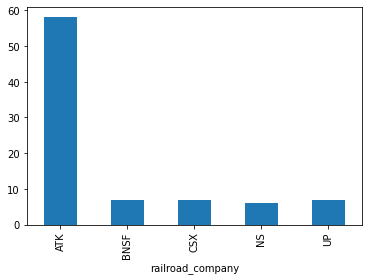

In [21]:
train.groupby('railroad_company').train_speed.median().plot(kind='bar')

In [20]:
train.groupby('railroad_company').speed.mean().plot(kind='bar')

AttributeError: 'DataFrameGroupBy' object has no attribute 'speed'

In [ ]:
plt.figure(figsize=(14,10))



ax = sns.boxplot(x="railroad_company", y="total_damage", data=train,whis=np.inf )
ax = sns.stripplot(x="railroad_company", y="total_damage", data=train, color=".3")
ax.set_xlabel('Railroad')
plt.title('How Do Total Damages($) From an Equipment Accident Vary by Railroad?')


plt.show()

In [ ]:
td_rr_df = test[['railroad_company', 'total_damage']]
td_rr_df.shape

In [ ]:
td_rr_df.to_excel('total_damages_by_rr.xlsx')

**Does total_damage have the same distribution shape for each railroad?**

In [9]:
#Subset the UP observations
up_train = train[train.railroad_company == 'UP']
up_train

,state_fips,railroad_company,accident_type,state_x,temp,visibility,weather,train_speed,train_direction,train_weight,...,region,typrr,lat,long,signal_type,date,season,state_y,state,year
incdtno,,,,,,,,,,,,,,,,,,,,,
0220RM030,32,UP,1,32,49,4,1,4,3.0,3163,...,7,1,36.278014,-115.067228,2,2020-02-25 23:15:00,Winter,36,NY,2020
1112RS011,6,UP,7,6,48,4,1,47,1.0,6595,...,7,1,37.312292,-120.51840200000001,1,2012-11-20 02:44:00,Fall,9,CT,2012
0113WH004,40,UP,1,40,32,4,1,4,2.0,6797,...,5,1,34.946889,-95.762725,2,2013-01-05 20:42:00,Winter,45,SC,2013
1019MA032,5,UP,7,5,47,4,1,62,1.0,4152,...,5,1,33.766832,-93.425298,1,2019-10-23 00:30:00,Fall,8,CO,2019
0617UT013,16,UP,12,16,76,2,1,4,3.0,1986,...,8,1,42.862689,-112.447621,2,2017-06-15 17:15:00,Summer,20,KS,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0420HO006,48,UP,12,48,76,2,2,9,2.0,794,...,5,1,30.063346999999997,-95.41197,2,2020-04-08 09:22:00,Spring,54,WV,2020
1017KC011,20,UP,1,20,45,2,2,10,4.0,0,...,6,1,39.099097,-94.609634,1,2017-10-10 09:00:00,Fall,24,MD,2017
1013PC004,16,UP,7,16,50,4,1,51,3.0,4387,...,8,1,44.252724,-117.00212900000001,1,2013-10-10 20:30:00,Fall,20,KS,2013


<AxesSubplot:>

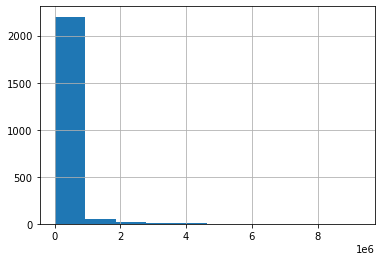

In [10]:
#View the dist of damages for UP
up_train.total_damage.hist()

<AxesSubplot:>

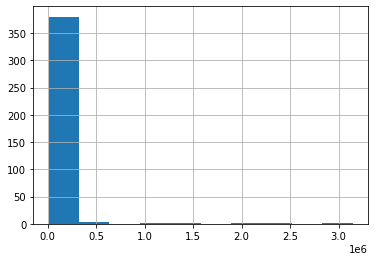

In [11]:
#Subset ATK
atk_train = train[train.railroad_company == 'ATK']

#View the Dist of Damages for ATK
atk_train.total_damage.hist()

**Explore Using crosstabs**

In [ ]:
pd.crosstab(train.state, train.railroad_company, normalize=True, margins=True)

In [ ]:
#View a crosstab of equip accidents by rr and state
rr_inc_by_state = pd.crosstab(train.state, train.railroad_company, margins=True)

In [ ]:
#Visualize Accidents by state
plt.figure(figsize=(16, 12))
rr_inc_by_state.All.plot(kind='bar', title="Which states have the most equipment rail accidents?")
plt.show()


**Takeaways:**
   - UP equipment accidents result in higher median total damages
   - Temperature spread is varied by railroad...Is this beacuse certain railroads operate in more specific climates?
   - Accident type should be a categorical value
   - Amtrak trains travel at higher speeds than other Railroads
   - BNSF accidents seem to incur > track damages on average
   - Amtrak incidents are missing train weight data
   - Texas has the most amount of equipment accidents than other states. Accounting for 14% of all accidents reported.

---

**Equipment Multivariate Exploration**

**Do Mean Total Damages Vary By the State in Which the Accident Occured?**

In [ ]:
up_inc = train[train.railroad_company == 'UP']
up_inc.shape

In [ ]:
up_inc.head()

In [ ]:
up_inc_tx = up_inc[up_inc.state == ' TX']
up_inc_tx.shape

In [ ]:
up_inc_tx.total_damage.hist()

In [ ]:
up_tx_inc.total_damage.mean()

In [ ]:
plt.figure(figsize=(20,16))
up_inc.groupby('state').mean('total_damage').plot(kind='barh')
plt.show()

In [ ]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["train_type", "cause", "typrr", "accident_type"],
             y_vars = ["train_speed","train_weight", "equip_damage", "track_damage"])

**Takeaways**
   - Amtrak trains go faster than non amtrck trains.
   - Pairplot seems to confer that BNSF equipment accidents result in > track damages. 

In [ ]:
"temp",
                        "train_speed",
                        "train_weight",
                        "equip_damage",
                        "track_damage","total_killed", "total_injured", "max_speed", "total_damage"

In [ ]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["train_type", "train_speed",
                        "max_speed", "accident_type"],
             y_vars = ["track_damage","total_killed", "total_injured", "total_damage"])

**Takeaways:**
   - Amtrak seems to be the exception for the observation that the > the train speed, the > the track damage.
   - Conversely, the greater the train speed for an Amtrak train, the > total_injured
   - Equipment rail incidents result in higher rates of injuries than in deaths

In [ ]:
sns.heatmap(train[["temp", "train_speed","track_damage","total_killed", "total_injured", "max_speed", "total_damage"]].corr(), cmap='Blues', annot=True)
plt.show()

**Takeaways**
   - The most interesting thing here is that total_injured is fairly correlated with total_damaged

---

## Questions from Exploration to Explore With Statistical Testing

**Do BNSF Equipment Incidents Result in Higher Track Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that track_damage is not normally distirbuted<br>
**H<sub>o</sub>: BNS equipment accidents do not result in higher track damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: BNS equipment accidents do result in higher track damages**

In [12]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that track_damage is not normally dist
confidence_interval = 0.99
a = 1 - confidence_interval 

#Define the two samples where x1 is BNSF Railroad accidents and x2 non-BNSF railroad accidents
x1 = train[train.railroad_company == 'BNSF'].track_damage
x2 = train[train.railroad_company != 'BNSF'].track_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:3668592.0 and the p-value is 2.8950726502963134e-05
We reject the null hypothesis.


**Do Amtrak Equipment Incidents Result in Higher Total Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that total_damage is not normally distirbuted<br>
**H<sub>o</sub>: Amtrack equipment accidents do not result in higher total damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: Amtrack equipment accidents do result in higher total damages**

In [13]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.99
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].total_damage
x2 = train[(train.railroad_company != 'ATK')].total_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:914650.5 and the p-value is 4.915352950160855e-07
We reject the null hypothesis.


**Do UP Incidents Result in Higher Total Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that total_damage is not normally distirbuted<br>
**H<sub>o</sub>: UP equipment accidents do not result in higher total damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: UP equipment accidents do result in higher total damages**

In [14]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.99
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'UP'].total_damage
x2 = train[train.railroad_company != 'UP'].total_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:4470358.5 and the p-value is 3.048315553007818e-07
We reject the null hypothesis.


**Is train_speed a effective feature for classifying railroad involved in an equipment accident?**

In [34]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].train_speed
x2 = train[train.railroad_company != 'ATK'].train_speed

#Run the test
t, p = stats.mannwhitneyu(x1, x2, alternative='greater')

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:1647055.0 and the p-value is 8.379487149604707e-69
We reject the null hypothesis.


In [45]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_speed is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'UP'].train_speed
x2 = train[train.railroad_company == 'ATK'].train_speed

#Run the test
t, p = stats.mannwhitneyu(x1, x2, alternative='less')

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:218432.0 and the p-value is 1.0942100115759696e-59
We reject the null hypothesis.


**Is train_type related to railroad?**

Chi Squared Test for examining the relationship between two categorical variables<br>
**H<sub>o</sub>: Train type is independent of railroad.<br>
H<sub>a</sub>: Train type has dependent on railroad.**

In [16]:
observed = pd.crosstab(train.railroad_company, train.train_type)
observed

train_type,1,2,3,4,5,6,7,8,9,A,B
railroad_company,,,,,,,,,,,
ATK,0,267,2,5,0,1,33,40,1,9,33
BNSF,835,1,0,4,5,18,576,106,30,10,1
CSX,448,0,0,3,16,58,212,16,2,2,0
NS,509,0,0,6,3,15,295,49,0,6,0
UP,1313,0,0,21,29,10,746,131,3,38,0


In [17]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[   0  267    2    5    0    1   33   40    1    9   33]
 [ 835    1    0    4    5   18  576  106   30   10    1]
 [ 448    0    0    3   16   58  212   16    2    2    0]
 [ 509    0    0    6    3   15  295   49    0    6    0]
 [1313    0    0   21   29   10  746  131    3   38    0]]
---
Expected

[[2.05493399e+02 1.77366283e+01 1.32362898e-01 2.58107651e+00
  3.50761679e+00 6.75050779e+00 1.23229858e+02 2.26340555e+01
  2.38253216e+00 4.30179418e+00 2.25016926e+00]
 [8.33535884e+02 7.19444821e+01 5.36899120e-01 1.04695328e+01
  1.42278267e+01 2.73818551e+01 4.99853081e+02 9.18097495e+01
  9.66418416e+00 1.74492214e+01 9.12728504e+00]
 [3.97847833e+02 3.43392011e+01 2.56262695e-01 4.99712255e+00
  6.79096141e+00 1.30693974e+01 2.38580569e+02 4.38209208e+01
  4.61272850e+00 8.32853758e+00 4.35646581e+00]
 [4.64068213e+02 4.00548409e+01 2.98916723e-01 5.82887610e+00
  7.92129316e+00 1.52447529e+01 2.78291469e+02 5.11147596e+01
  5.38050102e+00 9.71479350e+00 5.08158429e+0

**Takeaway:**
- The chi squared test revealed there is likely a significant relationship between the type of train and the railroad.
- Type of train would be a good feature for predicting railroad company, but it may result in too much coliniarity

---

**What features should be carried over to modeling for Equipment Rail Accidents?**
- track_damage
- state_fips
- total_damage
- weather
- equip_damage
- season
- railroad_company
- year

In [ ]:
df.columns.to_list()

---

## Explore HWY Rail

**Acquire HWY Rail**

In [ ]:
hwy_df = acquire.get_hwyrail()
hwy_df.head()

**Prep HWY Rail**

In [ ]:
hwy_df = prepare.prep_hwy_df(hwy_df)
hwy_df.shape

**Explore HWY Rail Univariate**

In [ ]:
hwy_df.info()

In [ ]:
cat_vars = ["railroad_company", "station", "county", "city", "vehicle_type", "vehicle_direction", "position",
           "hazmat_entity", "weather", "train_type", "track_type"]
quant_vars = ["vehicle_speed", "temp", "total_killed", "total_injured"]

In [ ]:
hwy_df.columns.to_list()

**Is there a relationship between train length and the railroad company?**